# Rendering the ground truth specular component of Hello Kitty

The goal of this notebook is to compute the ground truth values for the specular components of Hello Kitty to compare them with the results with our varying specular component.

In [2]:
import drjit as dr
import mitsuba as mi
mi.set_variant('llvm_ad_rgb')

[mitsuba] Warning: Couldn't import the ipywidgets package. Installing this package is required for the system to properly log messages and print in Jupyter notebooks!


## Rendering the environment map:

We render here the environment map on its own, which is the same one used for training and testing in our experiments.

In [15]:
envmap = mi.load_file("envmap.xml")
image_envmap = mi.render(envmap, spp=64)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


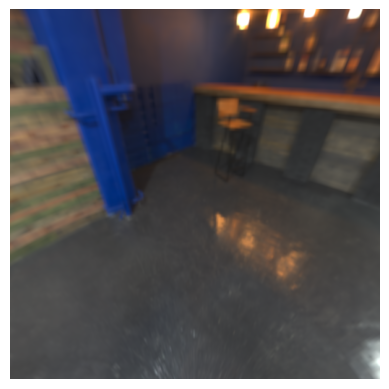

In [16]:

import matplotlib.pyplot as plt

plt.axis("off")
plt.imshow(image_envmap ** (1.0 / 2.2))

## Rendering a simple Hello Kitty mesh:

We render here a simple Hello Kitty mesh, without environment and without texture.

In [17]:
kitty = mi.load_file("kittybasic.xml")
image_kitty = mi.render(kitty, spp=64)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


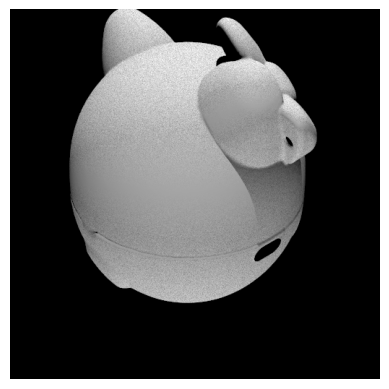

In [18]:
import matplotlib.pyplot as plt

plt.axis("off")
plt.imshow(image_kitty ** (1.0 / 2.2))

## Rendering Hello Kitty with texture:

We render a Hello Kitty mesh with the appropriate texture. The light sources chosen are arbitrary and are just here to showcase the texture. The Principled BSDF is used with matching specular and roughness parameters with the PhySG paper (0.3 specular reflectance, 0.05 roughness).

In [19]:
with_texture = mi.load_file("kitty_texture.xml")
image_with_texture = mi.render(with_texture, spp=64)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


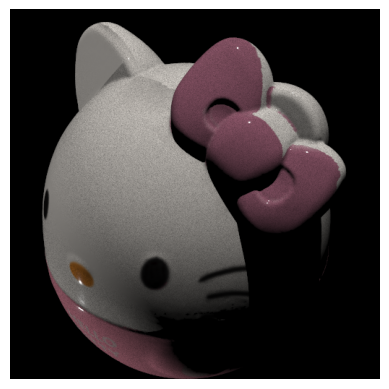

In [20]:
import matplotlib.pyplot as plt

plt.axis("off")
plt.imshow(image_with_texture ** (1.0 / 2.2))

## Rendering textured Hello Kitty in envmap

We render a Hello Kitty mesh with the appropriate texture in the environment map. The same BSDF as before with the same parameters is used.

In [21]:
with_texture_and_env = mi.load_file("texture_and_env.xml")
image_with_texture_env = mi.render(with_texture_and_env, spp=64)

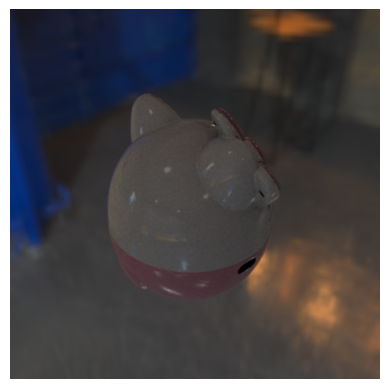

In [22]:
import matplotlib.pyplot as plt

plt.axis("off")
plt.imshow(image_with_texture_env ** (1.0 / 2.2))

## Recovering correct camera poses
The following code helps recover the C2W matrices in order to have the matching camera positions with the ones used in testing.

In [23]:
import json
import numpy as np

def read_cam_dict(cam_dict_file):
    with open(cam_dict_file) as fp:
        cam_dict = json.load(fp)
        for x in sorted(cam_dict.keys()):
            K = np.array(cam_dict[x]['K']).reshape((4, 4))
            W2C = np.array(cam_dict[x]['W2C']).reshape((4, 4))
            C2W = np.linalg.inv(W2C)

            cam_dict[x]['K'] = K
            cam_dict[x]['W2C'] = W2C
            cam_dict[x]['C2W'] = C2W
    return cam_dict

In [24]:
cam_dict = read_cam_dict('cam_dict_norm.json')

intrinsics = []
pose = []
for x in sorted(cam_dict.keys()):
    intrinsics.append(cam_dict[x]['K'].astype(np.float32))
    pose.append(cam_dict[x]['C2W'].astype(np.float32))


rgb_000100.exr
rgb_000101.exr
rgb_000102.exr
rgb_000103.exr
rgb_000104.exr
rgb_000105.exr
rgb_000106.exr
rgb_000107.exr
rgb_000108.exr
rgb_000109.exr
rgb_000110.exr
rgb_000111.exr
rgb_000112.exr
rgb_000113.exr
rgb_000114.exr
rgb_000115.exr
rgb_000116.exr
rgb_000117.exr
rgb_000118.exr
rgb_000119.exr
rgb_000120.exr
rgb_000121.exr
rgb_000122.exr
rgb_000123.exr
rgb_000124.exr
rgb_000125.exr
rgb_000126.exr
rgb_000127.exr
rgb_000128.exr
rgb_000129.exr
rgb_000130.exr
rgb_000131.exr
rgb_000132.exr
rgb_000133.exr
rgb_000134.exr
rgb_000135.exr
rgb_000136.exr
rgb_000137.exr
rgb_000138.exr
rgb_000139.exr
rgb_000140.exr
rgb_000141.exr
rgb_000142.exr
rgb_000143.exr
rgb_000144.exr
rgb_000145.exr
rgb_000146.exr
rgb_000147.exr
rgb_000148.exr
rgb_000149.exr
rgb_000150.exr
rgb_000151.exr
rgb_000152.exr
rgb_000153.exr
rgb_000154.exr
rgb_000155.exr
rgb_000156.exr
rgb_000157.exr
rgb_000158.exr
rgb_000159.exr
rgb_000160.exr
rgb_000161.exr
rgb_000162.exr
rgb_000163.exr
rgb_000164.exr
rgb_000165.exr
rgb_000166

## Rendering Hello Kitty's GT specular component

We render the ground truth specular component of Hello Kitty using the same camera coordinates used for testing in PhySG. The roughconductor BSDF, 0.3 specular reflectance and 0.05 roughness are used here just like in PhySG.

In [3]:
specular = mi.load_file("specular.xml")
image_with_specular = mi.render(specular, spp=64)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


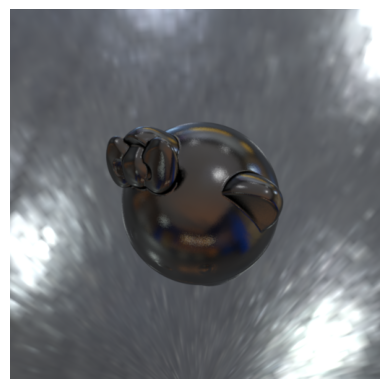

In [4]:
import matplotlib.pyplot as plt

plt.axis("off")
plt.imshow(image_with_specular ** (1.0 / 2.2))
plt.savefig('specular.png')